# 01. Single neuron and linear regression

## 01.1 Create a function (single linear neuron) with some inputs and outputs

In [1]:
%reset

import numpy as np

# Define the true weights and bias for a single linear neuron
# (see also http://d2l.ai/chapter_linear-networks/linear-regression-scratch.html)
true_weights = np.array([2, -3.4])
true_bias = 4.2

# Create some inputs using a standard normal distribution
number_examples = 1000
number_features = len(true_weights)
true_inputs = np.random.normal(loc=0.0, scale=1.0, size=(number_examples, number_features))

# Create some noise for all the examples using a normal distribution
true_noise = np.random.normal(loc=0.0, scale=0.01, size=number_examples)
    
# Compute the true outputs using the inputs, and the true weights, bias, and noise
true_outputs = np.matmul(true_inputs, true_weights) + true_bias + true_noise

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 01.2. Learn the parameters of the neuron using gradient descent

In [3]:
# Define the training parameters
number_epochs = 10
batch_size = 10
learning_rate = 0.03

# Initialize the predicted weights and bias
predicted_weights = np.random.normal(loc=0.0, scale=0.01, size=number_features)
predicted_bias = 0

# Initialize the loss for all the batches
number_batches = int(np.ceil(number_examples/batch_size))
predicted_loss = np.zeros(number_batches)

# Loop over the epochs
for i in range(number_epochs):
    
    # Loop over the batches
    k = 0
    for j in range(0, number_examples, batch_size):
        
        # Derive the end index of the batch
        j2 = min(j+batch_size, number_examples)
    
        # Compute the predicted outputs using the inputs, and the predicted weights and bias
        predicted_outputs = np.matmul(true_inputs[j:j2, :], predicted_weights) + predicted_bias

        # Compute the difference between the predicted outputs and the true outputs
        output_differences = predicted_outputs-true_outputs[j:j2]

        # Compute the loss using the mean squared error
        predicted_loss[k] = np.mean(0.5*np.power(output_differences, 2))
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
            
            # Update the predicted weights and bias using gradient descent, with the derivative of the loss function
            predicted_weights = predicted_weights - learning_rate*np.mean(true_inputs[j:j2, :]*(output_differences)[:, np.newaxis], axis=0)
            predicted_bias = predicted_bias - learning_rate*np.mean(output_differences, axis=0)
            
        # Update the index
        k = k+1
    
    # Print the epoch and loss
    print(f"Epoch: {i}; loss: {np.mean(predicted_loss)}")
    
# Print the predicted weights and bias
print("")
print(f"Predicted weights: {predicted_weights}")
print(f"Predicted bias: {predicted_bias}")

Epoch: 0; loss: 2.807381182249405
Epoch: 1; loss: 0.007380129512953676
Epoch: 2; loss: 6.909410222157558e-05
Epoch: 3; loss: 5.0295194624235685e-05
Epoch: 4; loss: 5.0285903610768096e-05
Epoch: 5; loss: 5.028793704541502e-05
Epoch: 6; loss: 5.028804101498053e-05
Epoch: 7; loss: 5.028804590192891e-05
Epoch: 8; loss: 5.0288046125235965e-05
Epoch: 9; loss: 5.028804613510797e-05

Predicted weights: [ 2.00047622 -3.40086932]
Predicted bias: 4.200254606410251


## 01.3. Learn the parameters of the neuron using gradient descent in Keras

In [4]:
import tensorflow as tf

# Define the training parameters
number_epochs = 10
batch_size = 10
learning_rate = 0.03

# Initialize the model (as a feedforward NN)
model = tf.keras.Sequential()

# Add an input with the number of features
model.add(tf.keras.Input(shape=number_features))

# Add a densely-connected NN layer without activation and with initialized weights and bias
model.add(tf.keras.layers.Dense(1, activation=None, \
                                kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01), \
                                bias_initializer="zeros"))

# Configure the model for training with gradient descent optimizer and mean squared error loss
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              loss="mean_squared_error")

# Train the model give the batch size and number of epochs
model.fit(x=true_inputs, y=true_outputs, batch_size=batch_size, epochs=number_epochs, verbose=1)

# Print the predicted weights and bias
print("")
print(f"Predicted weights: {model.get_weights()[0][:, 0]}")
print(f"Predicted bias: {model.get_weights()[1][0]}")

Epoch 1/10
100/100 [==============================] - 0s 323us/step - loss: 9.1281
Epoch 2/10
100/100 [==============================] - 0s 323us/step - loss: 1.3902e-04
Epoch 3/10
100/100 [==============================] - 0s 313us/step - loss: 1.1022e-04
Epoch 4/10
100/100 [==============================] - 0s 313us/step - loss: 1.0328e-04
Epoch 5/10
100/100 [==============================] - 0s 313us/step - loss: 9.4556e-05
Epoch 6/10
100/100 [==============================] - 0s 313us/step - loss: 9.9818e-05
Epoch 7/10
100/100 [==============================] - 0s 303us/step - loss: 9.8465e-05
Epoch 8/10
100/100 [==============================] - 0s 313us/step - loss: 1.0266e-04
Epoch 9/10
100/100 [==============================] - 0s 313us/step - loss: 1.0583e-04
Epoch 10/10
100/100 [==============================] - 0s 333us/step - loss: 1.0157e-04

Predicted weights: [ 1.9997044 -3.4000883]
Predicted bias: 4.2004523277282715


## 01.4. Learn the parameters of the neuron using an evolutionary algorithm

In [28]:
# Define the training parameters
number_epochs = 10
batch_size = 10
number_individuals = 10
number_parents = 2
mutation_rate = 0.01

# Initialize the predicted weights and bias for all the individuals
predicted_weights = np.random.normal(loc=0.0, scale=0.01, size=(number_features, number_individuals))
predicted_bias = np.zeros((1, number_individuals))

# Initialize the loss for all the batches and for all the individuals
number_batches = int(np.ceil(number_examples/batch_size))
predicted_loss = np.zeros((number_batches, number_individuals))

# Loop over the epochs
for i in range(number_epochs):
    
    # Loop over the batches
    k = 0
    for j in range(0, number_examples, batch_size):
        
        # Derive the end index of the batch
        j2 = min(j+batch_size, number_examples)
    
        # Compute the predicted outputs using the inputs, and the predicted weights and bias, for every individual
        predicted_outputs = np.matmul(true_inputs[j:j2, :], predicted_weights) + predicted_bias

        # Compute the loss using the mean squared error, for every individual
        predicted_loss[k, :] = np.mean(np.power(predicted_outputs-true_outputs[j:j2, np.newaxis], 2), axis=0)
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
        
            # Get the indices of the parents (the fittest individuals)
            parent_indices = np.argsort(predicted_loss[k, :])[0:number_parents]

            # Compute the mutation scale using the root mean square error
#             mutation_scale = mutation_rate*np.mean(np.sqrt(predicted_loss[k, parent_indices]))
            mutation_scale = mutation_rate
            
            # Update the predicted weights and bias using evolutionary algorithm, doing crossover and mutation
            predicted_weights = np.mean(predicted_weights[:, parent_indices], axis=1)[:, np.newaxis] \
            + np.random.normal(loc=0.0, scale=mutation_scale, size=(number_features, number_individuals))
            predicted_bias = np.mean(predicted_bias[:, parent_indices]) \
            + np.random.normal(loc=0.0, scale=mutation_scale, size=(1, number_individuals))
        
        # Update the index
        k = k+1
        
    # Print the epoch and loss
    print(f"Epoch: {i}; loss: {np.mean(predicted_loss)}")
    
# Print the predicted weights and bias
print("")
print(f"Predicted weights: {np.mean(predicted_weights, axis=1)}")
print(f"Predicted bias: {np.mean(predicted_bias)}")

Epoch: 0; loss: 26.897866674413258
Epoch: 1; loss: 16.06248306688759
Epoch: 2; loss: 8.154123742806458
Epoch: 3; loss: 3.031338746108943
Epoch: 4; loss: 0.4802756430756115
Epoch: 5; loss: 0.0004991430576896392
Epoch: 6; loss: 0.00046667955682682804
Epoch: 7; loss: 0.0004253809875969144
Epoch: 8; loss: 0.0004750709858077368
Epoch: 9; loss: 0.00047044497029035645

Predicted weights: [ 2.0065589  -3.40778964]
Predicted bias: 4.204084057499762


## 01.4.2. Learn the parameters of the neuron using a simpler evolutionary algorithm

In [4]:
# Define the training parameters
number_epochs = 10
batch_size = 10
mutation_scale = 0.01

# Initialize the predicted weights and bias
predicted_weights = np.random.normal(loc=0.0, scale=0.01, size=number_features)
predicted_bias = 0

# Initialize the loss for all the batches
number_batches = int(np.ceil(number_examples/batch_size))
predicted_loss = np.zeros(number_batches)

# Loop over the epochs
for i in range(number_epochs):
    
    # Loop over the batches
    k = 0
    for j in range(0, number_examples, batch_size):
        
        # Derive the end index of the batch
        j2 = min(j+batch_size, number_examples)
    
        # Compute the predicted outputs using the inputs, and the predicted weights and bias
        predicted_outputs = np.matmul(true_inputs[j:j2, :], predicted_weights) + predicted_bias
        
        # Compute the loss using the mean squared error
        predicted_loss[k] = np.mean(0.5*np.power(predicted_outputs-true_outputs[j:j2], 2))
        
        # Initialize the next loss
        predicted_loss2 = np.inf
        
        # While the next predicted loss is higher
        while predicted_loss2 >= predicted_loss[k]:
            
            # Mutate the weights and biases
            predicted_weights2 = predicted_weights + np.random.normal(loc=0.0, scale=mutation_scale, size=number_features)
            predicted_bias2 = predicted_bias + np.random.normal(loc=0.0, scale=mutation_scale, size=1)
            
            # Compute the new outputs and loss
            predicted_outputs2 = np.matmul(true_inputs[j:j2, :], predicted_weights2) + predicted_bias2
            predicted_loss2 = np.mean(0.5*np.power(predicted_outputs2-true_outputs[j:j2], 2))
            
        # Update the weights, biases, and loss
        predicted_weights = predicted_weights2
        predicted_bias = predicted_bias2
        predicted_loss[k] = predicted_loss2
        
        # Update the index
        k = k+1
    
    # Print the epoch and loss
    print(f"Epoch: {i}; loss: {np.mean(predicted_loss)}")
    
# Print the predicted weights and bias
print("")
print(f"Predicted weights: {predicted_weights}")
print(f"Predicted bias: {predicted_bias}")

Epoch: 0; loss: 14.581932133926273
Epoch: 1; loss: 11.01539527568979
Epoch: 2; loss: 7.63519800119996
Epoch: 3; loss: 5.141186999830657
Epoch: 4; loss: 3.051591431751862
Epoch: 5; loss: 1.4275073563002685
Epoch: 6; loss: 0.4512101060351321
Epoch: 7; loss: 0.06113876989297018
Epoch: 8; loss: 6.900953180115491e-05
Epoch: 9; loss: 6.910276636076725e-05

Predicted weights: [ 1.9985486 -3.3914613]
Predicted bias: [4.20189945]


# 02. Single neuron and softmax regression

## 02.1. Prepare a dataset for a multiclass classification problem

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


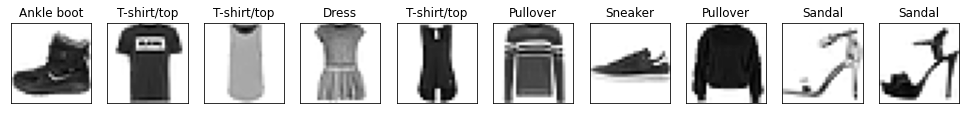

In [1]:
%reset

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Import the fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', \
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show some of the data
plt.figure(figsize=(17, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

# Get the number of train and test examples and the sizes of the inputs and outputs
number_train = np.shape(train_images)[0]
number_test = np.shape(test_images)[0]
input_size = np.shape(train_images)[1]*np.shape(train_images)[2]
output_size = len(class_names)

# Reshape the inputs and normalize them
train_inputs = np.reshape(train_images, (number_train, input_size))
train_inputs = train_inputs/255
test_inputs = np.reshape(test_images, (number_test, input_size))
test_inputs = test_inputs/255

# Transform the outputs from label numbers to one-hot vectors
train_outputs = np.zeros((number_train, output_size))
for i in range(number_train):
    train_outputs[i, train_labels[i]] = 1
test_outputs = np.zeros((number_test, output_size))
for i in range(number_test):
    test_outputs[i, test_labels[i]] = 1

## 02.2. Learn the parameters of a neuron using gradient descent

In [2]:
# Define the training parameters
number_epochs = 10
batch_size = 256
learning_rate = 0.1

# Initialize the weights and biases
train_weights = np.random.normal(loc=0.0, scale=0.01, size=(input_size, output_size))
train_biases = np.zeros(output_size)

# Initialize the loss and the accuracy for all the batches
number_batches = int(np.ceil(number_train/batch_size))
train_loss = np.zeros(number_batches)
train_accuracy = np.zeros(number_batches)

# Loop over the epochs
for i in range(number_epochs):
    
    # Compute the predicted test outputs using the test inputs, and the learned weights and biases
    test_outputs2 = np.matmul(test_inputs, train_weights) + train_biases
    
    # Compute the conditional probabilities of each class using the softmax function
    # (modified to avoid numerical stability issues)
    test_outputs2 = test_outputs2-np.max(test_outputs2, axis=1)[:, np.newaxis]
    test_exp = np.exp(test_outputs2)
    test_softmax = test_exp/np.sum(test_exp, axis=1)[:, np.newaxis]
    
    # Compute the classification accuracy given the true test labels
    test_accuracy = np.mean(np.argmax(test_softmax, axis=1)==test_labels)
    
    # Loop over the batches
    k = 0
    for j in range(0, number_train, batch_size):
        
        # Derive the end index for the current batch
        j2 = min(j+batch_size, number_train)
    
        # Compute the predicted train outputs using the train inputs, and the learned weights and biases
        train_outputs2 = np.matmul(train_inputs[j:j2, :], train_weights) + train_biases
        
        # Compute the conditional probabilities of each class using the softmax function
        # (modified to avoid numerical stability issues)
        train_outputs2 = train_outputs2-np.max(train_outputs2, axis=1)[:, np.newaxis]
        train_exp = np.exp(train_outputs2)
        train_softmax = train_exp/np.sum(train_exp, axis=1)[:, np.newaxis]
        
        # Compute the cross-entropy loss given the true train outputs
        # (rewritten to avoid numerical stability issues)
#         train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]*np.log(train_softmax), axis=1))
        train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]\
                                        *(train_outputs2-np.log(np.sum(train_exp, axis=1)[:, np.newaxis])), axis=1))
        
        # Compute the classification accuracy given the true train labels
        train_accuracy[k] = np.mean(np.argmax(train_softmax, axis=1)==train_labels[j:j2])
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
            
            # Compute the derivative of the loss wrt the output (logit before softmax)
            train_derivative = train_softmax-train_outputs[j:j2, :]
            
            # Get the real batch size
            batch_size2 = j2-j
            
            # Update the weights and biases using gradient descent
            train_weights = train_weights-learning_rate*np.matmul(train_inputs[j:j2, :].T, train_derivative)/batch_size2
            train_biases = train_biases-learning_rate*np.sum(train_derivative, axis=0)/batch_size2
            
        # Update the index
        k = k+1
        
    # Print the epoch and loss
    print(f"Epoch: {i}; train loss: {np.mean(train_loss)}; train accuracy: {np.mean(train_accuracy)}; test accuracy: {test_accuracy}")

Epoch: 0; train loss: 0.7855716560892787; train accuracy: 0.7491245567375886; test accuracy: 0.0297
Epoch: 1; train loss: 0.5705284719977561; train accuracy: 0.8129820478723404; test accuracy: 0.7846
Epoch: 2; train loss: 0.5254094318775078; train accuracy: 0.8256150265957447; test accuracy: 0.8106
Epoch: 3; train loss: 0.5012243073202076; train accuracy: 0.8313996010638298; test accuracy: 0.82
Epoch: 4; train loss: 0.48539602277901445; train accuracy: 0.8365192819148937; test accuracy: 0.8245
Epoch: 5; train loss: 0.4739351007393337; train accuracy: 0.8401817375886524; test accuracy: 0.8269
Epoch: 6; train loss: 0.4651120237820652; train accuracy: 0.8426917109929077; test accuracy: 0.8293
Epoch: 7; train loss: 0.4580332127250818; train accuracy: 0.844669769503546; test accuracy: 0.8318
Epoch: 8; train loss: 0.45218142462919975; train accuracy: 0.846481604609929; test accuracy: 0.8338
Epoch: 9; train loss: 0.4472325915750717; train accuracy: 0.847794769503546; test accuracy: 0.8352


## 02.3. Make predictions using the trained neuron

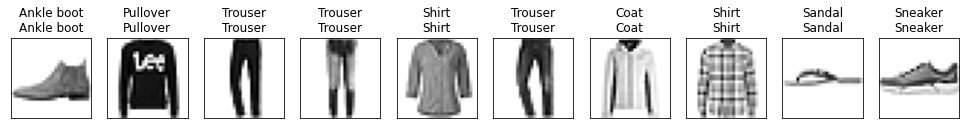

In [8]:
# Compute the predicted test outputs using the test inputs, and the learned weights and biases
test_outputs2 = np.matmul(test_inputs, train_weights) + train_biases

# Compute the conditional probabilities of each class using the softmax function
# (modified to avoid numerical stability issues)
test_outputs2 = test_outputs2-np.max(test_outputs2, axis=1)[:, np.newaxis]
test_exp = np.exp(test_outputs2)
test_softmax = test_exp/np.sum(test_exp, axis=1)[:, np.newaxis]

# Compute the predicted labels
test_labels2 = np.argmax(test_softmax, axis=1)

# Show the data with the true and predicted labels
plt.figure(figsize=(17, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(class_names[test_labels[i]] + "\n" + class_names[test_labels2[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

## 02.4. Learn the parameters of a neuron using gradient descent in Keras

In [4]:
import tensorflow as tf

# Define the training parameters
number_epochs = 10
batch_size = 256
learning_rate = 0.1

# Initialize the model (as a feedforward NN)
model = tf.keras.Sequential()

# Add an input with the number of features
model.add(tf.keras.Input(shape=input_size))

# Add a densely-connected NN layer without activation and with initialized weights and bias
model.add(tf.keras.layers.Dense(output_size, activation=None, \
                                kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01), \
                                bias_initializer="zeros"))

# Configure the model for training with gradient descent optimizer and cross-entropy loss
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), \
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), \
              metrics=["accuracy"])

# Train the model give the batch size and number of epochs
model.fit(x=train_inputs, y=train_outputs, batch_size=batch_size, epochs=number_epochs, verbose=1)

Epoch 1/10
235/235 [==============================] - 1s 799us/step - loss: 1.0232 - accuracy: 0.6793
Epoch 2/10
235/235 [==============================] - 0s 744us/step - loss: 0.5823 - accuracy: 0.8089
Epoch 3/10
235/235 [==============================] - 0s 735us/step - loss: 0.5318 - accuracy: 0.8235
Epoch 4/10
235/235 [==============================] - 0s 722us/step - loss: 0.5060 - accuracy: 0.8305
Epoch 5/10
235/235 [==============================] - 0s 731us/step - loss: 0.4898 - accuracy: 0.8356
Epoch 6/10
235/235 [==============================] - 0s 726us/step - loss: 0.4771 - accuracy: 0.8388
Epoch 7/10
235/235 [==============================] - 0s 718us/step - loss: 0.4713 - accuracy: 0.8431
Epoch 8/10
235/235 [==============================] - 0s 718us/step - loss: 0.4556 - accuracy: 0.8467
Epoch 9/10
235/235 [==============================] - 0s 722us/step - loss: 0.4533 - accuracy: 0.8484
Epoch 10/10
235/235 [==============================] - 0s 722us/step - loss: 0.450

## 02.5. Learn the parameters of a neuron using an EA

In [3]:
# Define the training parameters
number_epochs = 10
batch_size = 256
number_individuals = 10
number_parents = 2
mutation_rate = 0.001

# Initialize the weights and biases for all the individuals
train_weights = np.random.normal(loc=0.0, scale=0.01, size=(input_size, output_size, number_individuals))
train_biases = np.zeros((output_size, number_individuals))

# Initialize the loss and the accuracy for all the batches and for all the individuals
number_batches = int(np.ceil(number_train/batch_size))
train_loss = np.zeros((number_batches, number_individuals))
train_accuracy = np.zeros((number_batches, number_individuals))

# Loop over the epochs
for i in range(number_epochs):
    
    # Compute the predicted test outputs using the test inputs, and the learned weights and biases
    test_outputs2 = np.matmul(test_inputs, np.mean(train_weights, axis=2)) + np.mean(train_biases, axis=1)[np.newaxis, :]
    
    # Compute the conditional probabilities of each class using the softmax function
    # (modified to avoid numerical stability issues)
    test_outputs2 = test_outputs2-np.max(test_outputs2, axis=1)[:, np.newaxis]
    test_exp = np.exp(test_outputs2)
    test_softmax = test_exp/np.sum(test_exp, axis=1)[:, np.newaxis]
    
    # Compute the classification accuracy given the true test labels
    test_accuracy = np.mean(np.argmax(test_softmax, axis=1)==test_labels)
    
    # Loop over the batches
    k = 0
    for j in range(0, number_train, batch_size):
        
        # Derive the end index for the current batch
        j2 = min(j+batch_size, number_train)
    
        # Compute the predicted train outputs using the train inputs, and the learned weights and biases, for every individual
        train_outputs2 = np.tensordot(train_inputs[j:j2, :], train_weights, axes=(1,0)) + train_biases[np.newaxis, :, :]
        
        # Compute the conditional probabilities of each class using the softmax function
        # (modified to avoid numerical stability issues)
        train_outputs2 = train_outputs2-np.max(train_outputs2, axis=1)[:, np.newaxis, :]
        train_exp = np.exp(train_outputs2)
        train_softmax = train_exp/np.sum(train_exp, axis=1)[:, np.newaxis, :]
        
        # Compute the cross-entropy loss given the true train outputs
        # (rewritten to avoid numerical stability issues)
#         train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :, np.newaxis]*np.log(train_softmax), axis=1), axis=0)
        train_loss[k, :] = np.mean(-np.sum(train_outputs[j:j2, :, np.newaxis]\
                                        *(train_outputs2-np.log(np.sum(train_exp, axis=1)[:, np.newaxis, :])), axis=1), axis=0)
        
        # Compute the classification accuracy given the true train labels
        train_accuracy[k, :] = np.mean(np.argmax(train_softmax, axis=1) == train_labels[j:j2, np.newaxis], axis=0)
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
            
            # Get the indices of the parents (the fittest individuals)
            parent_indices = np.argsort(train_loss[k, :])[0:number_parents]

            # Compute the mutation scale using the root mean square error
            mutation_scale = mutation_rate*np.mean(np.sqrt(train_loss[k, parent_indices]))
            mutation_scale = mutation_rate
            
            # Update the weights and bias using EA, doing crossover and mutation
            train_weights = np.mean(train_weights[:, :, parent_indices], axis=2)[:, :, np.newaxis] \
            + np.random.normal(loc=0.0, scale=mutation_scale, size=(input_size, output_size, number_individuals))
            train_biases = np.mean(train_biases[:, parent_indices], axis=1)[:, np.newaxis] \
            + np.random.normal(loc=0.0, scale=mutation_scale, size=(output_size, number_individuals))
            
        # Update the index
        k = k+1
        
    # Print the epoch and loss
    print(f"Epoch: {i}; train loss: {np.mean(train_loss)}; train accuracy: {np.mean(train_accuracy)}; test accuracy: {test_accuracy}")

Epoch: 0; train loss: 2.1066414997392227; train accuracy: 0.41031471631205674; test accuracy: 0.0597
Epoch: 1; train loss: 1.7876790822613053; train accuracy: 0.5734142287234043; test accuracy: 0.515
Epoch: 2; train loss: 1.5628450446338356; train accuracy: 0.6204205452127659; test accuracy: 0.594
Epoch: 3; train loss: 1.3851167368465085; train accuracy: 0.651838984929078; test accuracy: 0.637
Epoch: 4; train loss: 1.255583523825976; train accuracy: 0.6632624113475176; test accuracy: 0.6479
Epoch: 5; train loss: 1.1530208767765424; train accuracy: 0.670922539893617; test accuracy: 0.6577
Epoch: 6; train loss: 1.0741194259980318; train accuracy: 0.6827654033687942; test accuracy: 0.6661
Epoch: 7; train loss: 1.0119645946965712; train accuracy: 0.6942913342198582; test accuracy: 0.6798
Epoch: 8; train loss: 0.9601128186106047; train accuracy: 0.7025825576241135; test accuracy: 0.6862
Epoch: 9; train loss: 0.9213608524312786; train accuracy: 0.7128285682624113; test accuracy: 0.6977


## 02.5.2. Learn the parameters of a neuron using a simpler EA

In [3]:
# Define the training parameters
number_epochs = 10
batch_size = 256
mutation_scale = 0.001

# Initialize the weights and biases
train_weights = np.random.normal(loc=0.0, scale=0.01, size=(input_size, output_size))
train_biases = np.zeros(output_size)

# Initialize the loss and the accuracy for all the batches
number_batches = int(np.ceil(number_train/batch_size))
train_loss = np.zeros(number_batches)
train_accuracy = np.zeros(number_batches)

# Loop over the epochs
for i in range(number_epochs):
    
    # Compute the predicted test outputs using the test inputs, and the learned weights and biases
    test_outputs2 = np.matmul(test_inputs, train_weights) + train_biases
    
    # Compute the conditional probabilities of each class using the softmax function
    # (modified to avoid numerical stability issues)
    test_outputs2 = test_outputs2-np.max(test_outputs2, axis=1)[:, np.newaxis]
    test_exp = np.exp(test_outputs2)
    test_softmax = test_exp/np.sum(test_exp, axis=1)[:, np.newaxis]
    
    # Compute the classification accuracy given the true test labels
    test_accuracy = np.mean(np.argmax(test_softmax, axis=1)==test_labels)
    
    # Loop over the batches
    k = 0
    for j in range(0, number_train, batch_size):
        
        # Derive the end index for the current batch
        j2 = min(j+batch_size, number_train)
    
        # Compute the predicted train outputs using the train inputs, and the learned weights and biases
        train_outputs2 = np.matmul(train_inputs[j:j2, :], train_weights) + train_biases
        
        # Compute the conditional probabilities of each class using the softmax function
        # (modified to avoid numerical stability issues)
        train_outputs2 = train_outputs2-np.max(train_outputs2, axis=1)[:, np.newaxis]
        train_exp = np.exp(train_outputs2)
        train_softmax = train_exp/np.sum(train_exp, axis=1)[:, np.newaxis]
        
        # Compute the cross-entropy loss given the true train outputs
        # (rewritten to avoid numerical stability issues)
#         train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]*np.log(train_softmax), axis=1))
        train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]\
                                        *(train_outputs2-np.log(np.sum(train_exp, axis=1)[:, np.newaxis])), axis=1))
        
        # Compute the classification accuracy given the true train labels
        train_accuracy[k] = np.mean(np.argmax(train_softmax, axis=1)==train_labels[j:j2])
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
            
            # Initialize the next loss
            train_loss2 = np.inf
            
            # While the next loss is higher
            while train_loss2 >= train_loss[k]:
                
                # Mutate the weights and biases
                train_weights2 = train_weights + np.random.normal(loc=0.0, scale=mutation_scale, size=(input_size, output_size))
                train_biases2 = train_biases + np.random.normal(loc=0.0, scale=mutation_scale, size=output_size)

                # Compute the new outputs and loss
                train_outputs2 = np.matmul(train_inputs[j:j2, :], train_weights2) + train_biases2
                train_outputs2 = train_outputs2-np.max(train_outputs2, axis=1)[:, np.newaxis]
                train_exp = np.exp(train_outputs2)
                train_softmax = train_exp/np.sum(train_exp, axis=1)[:, np.newaxis]
                train_loss2 = np.mean(-np.sum(train_outputs[j:j2, :]
                                              *(train_outputs2-np.log(np.sum(train_exp, axis=1)[:, np.newaxis])), axis=1))
                train_accuracy2 = np.mean(np.argmax(train_softmax, axis=1)==train_labels[j:j2])
                
            # Update the weights, biases, and loss
            train_weights = train_weights2
            train_biases = train_biases2
            train_loss[k] = train_loss2
            train_accuracy[k] = train_accuracy2
            
        # Update the index
        k = k+1
        
    # Print the epoch and loss
    print(f"Epoch: {i}; train loss: {np.mean(train_loss)}; train accuracy: {np.mean(train_accuracy)}; test accuracy: {test_accuracy}")

Epoch: 0; train loss: 2.20492530457499; train accuracy: 0.24437610815602837; test accuracy: 0.0582
Epoch: 1; train loss: 1.9796153907350387; train accuracy: 0.4308953900709219; test accuracy: 0.4047
Epoch: 2; train loss: 1.7863063826107977; train accuracy: 0.5380596187943263; test accuracy: 0.4798
Epoch: 3; train loss: 1.626341069043144; train accuracy: 0.592719414893617; test accuracy: 0.5557
Epoch: 4; train loss: 1.492783090011512; train accuracy: 0.6278313386524822; test accuracy: 0.6144
Epoch: 5; train loss: 1.3805591891496518; train accuracy: 0.6434563386524822; test accuracy: 0.6252
Epoch: 6; train loss: 1.2861344866884479; train accuracy: 0.6527870124113476; test accuracy: 0.6381
Epoch: 7; train loss: 1.2137612914433638; train accuracy: 0.6587156471631205; test accuracy: 0.639
Epoch: 8; train loss: 1.151554831526454; train accuracy: 0.6683122783687944; test accuracy: 0.6542
Epoch: 9; train loss: 1.0970406971851268; train accuracy: 0.6761580230496455; test accuracy: 0.6682


In [33]:
# Define the training parameters
number_epochs = 10
batch_size = 256
mutation_scale = 1

# Initialize the weights and biases
train_weights = np.random.normal(loc=0.0, scale=0.01, size=(input_size, output_size, 2))
train_biases = np.random.normal(loc=0.0, scale=0.01, size=(output_size, 2))

# Initialize the loss and the accuracy for all the batches
number_batches = int(np.ceil(number_train/batch_size))
train_loss = np.zeros(number_batches)
train_accuracy = np.zeros(number_batches)

# Loop over the epochs
k = 0
for i in range(number_epochs):
    
    # Compute the predicted test outputs using the test inputs, and the learned weights and biases
    test_outputs2 = np.matmul(test_inputs, train_weights[:, :, 1]) + train_biases[:, 1]
    
    # Compute the conditional probabilities of each class using the softmax function
    # (modified to avoid numerical stability issues)
    test_outputs2 = test_outputs2-np.max(test_outputs2, axis=1)[:, np.newaxis]
    test_exp = np.exp(test_outputs2)
    test_softmax = test_exp/np.sum(test_exp, axis=1)[:, np.newaxis]
    
    # Compute the classification accuracy given the true test labels
    test_accuracy = np.mean(np.argmax(test_softmax, axis=1)==test_labels)
    
    # Loop over the batches
    k = 0
    for j in range(0, number_train, batch_size):
        
        # Derive the end index for the current batch
        j2 = min(j+batch_size, number_train)
    
        # Compute the predicted train outputs using the train inputs, and the learned weights and biases
        train_outputs2 = np.matmul(train_inputs[j:j2, :], train_weights[:, :, 1]) + train_biases[:, 1]
        
        # Compute the conditional probabilities of each class using the softmax function
        # (modified to avoid numerical stability issues)
        train_outputs2 = train_outputs2-np.max(train_outputs2, axis=1)[:, np.newaxis]
        train_exp = np.exp(train_outputs2)
        train_softmax = train_exp/np.sum(train_exp, axis=1)[:, np.newaxis]
        
        # Compute the cross-entropy loss given the true train outputs
        # (rewritten to avoid numerical stability issues)
#         train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]*np.log(train_softmax), axis=1))
        train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]\
                                        *(train_outputs2-np.log(np.sum(train_exp, axis=1)[:, np.newaxis])), axis=1))
        
        # Compute the classification accuracy given the true train labels
        train_accuracy[k] = np.mean(np.argmax(train_softmax, axis=1)==train_labels[j:j2])
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
            
            # Initialize the next loss
            train_loss2 = np.inf
            
            # While the next loss is higher
            while train_loss2 >= train_loss[k]:
                
                # Mutate the weights and biases
                train_weights2 = train_weights[:, :, 1] - (train_weights[:, :, 1]-train_weights[:, :, 0])*np.random.normal(loc=0, scale=mutation_scale, size=(input_size, output_size))
                train_biases2 = train_biases[:, 1] - (train_biases[:, 1]-train_biases[:, 0])*np.random.normal(loc=0, scale=mutation_scale, size=output_size)
                                
                # Compute the new outputs and loss
                train_outputs2 = np.matmul(train_inputs[j:j2, :], train_weights2) + train_biases2
                train_outputs2 = train_outputs2-np.max(train_outputs2, axis=1)[:, np.newaxis]
                train_exp = np.exp(train_outputs2)
                train_softmax = train_exp/np.sum(train_exp, axis=1)[:, np.newaxis]
                train_loss2 = np.mean(-np.sum(train_outputs[j:j2, :]
                                              *(train_outputs2-np.log(np.sum(train_exp, axis=1)[:, np.newaxis])), axis=1))
                train_accuracy2 = np.mean(np.argmax(train_softmax, axis=1)==train_labels[j:j2])
                
            # Update the weights, biases, and loss
            train_weights[:, :, 1] = train_weights2
            train_biases[:, 1] = train_biases2
            train_loss[k] = train_loss2
            train_accuracy[k] = train_accuracy2
            
            train_weights[:, :, 0] = train_weights2
            train_biases[:, 0] = train_biases2
            
        # Update the index
        k = k+1
        
    # Print the epoch and loss
    print(f"Epoch: {i}; train loss: {np.mean(train_loss)}; train accuracy: {np.mean(train_accuracy)}; test accuracy: {test_accuracy}")

KeyboardInterrupt: 

In [19]:
# Define the training parameters
number_epochs = 10
batch_size = 256
learning_rate = 0.1

# Initialize the weights and biases
train_weights = np.random.normal(loc=0.0, scale=0.01, size=(input_size, output_size))
train_biases = np.zeros(output_size)
weight_mask = np.ones((input_size, output_size))

# Initialize the loss and the accuracy for all the batches
number_batches = int(np.ceil(number_train/batch_size))
train_loss = np.zeros(number_batches)
train_accuracy = np.zeros(number_batches)

# Loop over the epochs
for i in range(number_epochs):
    
    # Compute the predicted test outputs using the test inputs, and the learned weights and biases
    test_outputs2 = np.matmul(test_inputs, train_weights) + train_biases
    
    # Compute the conditional probabilities of each class using the softmax function
    # (modified to avoid numerical stability issues)
    test_outputs2 = test_outputs2-np.max(test_outputs2, axis=1)[:, np.newaxis]
    test_exp = np.exp(test_outputs2)
    test_softmax = test_exp/np.sum(test_exp, axis=1)[:, np.newaxis]
    
    # Compute the classification accuracy given the true test labels
    test_accuracy = np.mean(np.argmax(test_softmax, axis=1)==test_labels)
    
    # Loop over the batches
    k = 0
    for j in range(0, number_train, batch_size):
        
        # Derive the end index for the current batch
        j2 = min(j+batch_size, number_train)
    
        # Compute the predicted train outputs using the train inputs, and the learned weights and biases
        train_outputs2 = np.matmul(train_inputs[j:j2, :], train_weights) + train_biases
        
        # Compute the conditional probabilities of each class using the softmax function
        # (modified to avoid numerical stability issues)
        train_outputs2 = train_outputs2-np.max(train_outputs2, axis=1)[:, np.newaxis]
        train_exp = np.exp(train_outputs2)
        train_softmax = train_exp/np.sum(train_exp, axis=1)[:, np.newaxis]
        
        # Compute the cross-entropy loss given the true train outputs
        # (rewritten to avoid numerical stability issues)
#         train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]*np.log(train_softmax), axis=1))
        train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]\
                                        *(train_outputs2-np.log(np.sum(train_exp, axis=1)[:, np.newaxis])), axis=1))
        
        # Compute the classification accuracy given the true train labels
        train_accuracy[k] = np.mean(np.argmax(train_softmax, axis=1)==train_labels[j:j2])
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
            
            # Compute the derivative of the loss wrt the output (logit before softmax)
            train_derivative = train_softmax-train_outputs[j:j2, :]
            
            # Get the real batch size
            batch_size2 = j2-j
            
            # Update the weights and biases using gradient descent
            train_weights2 = train_weights-learning_rate*np.matmul(train_inputs[j:j2, :].T, train_derivative)/batch_size2
            train_biases2 = train_biases-learning_rate*np.sum(train_derivative, axis=0)/batch_size2
            
            ind = np.unravel_index(np.argmax(np.abs(train_weights-train_weights2)), (input_size, output_size))
            weight_mask[ind] = 0
            train_weights = train_weights*weight_mask
            
        # Update the index
        k = k+1
        
    # Print the epoch and loss
    print(f"Epoch: {i}; train loss: {np.mean(train_loss)}; train accuracy: {np.mean(train_accuracy)}; test accuracy: {test_accuracy}")

Epoch: 0; train loss: 2.3073821353868516; train accuracy: 0.16941489361702128; test accuracy: 0.1625
Epoch: 1; train loss: 2.309283800165026; train accuracy: 0.1646775265957447; test accuracy: 0.161
Epoch: 2; train loss: 2.309283800165026; train accuracy: 0.1646775265957447; test accuracy: 0.161
Epoch: 3; train loss: 2.309283800165026; train accuracy: 0.1646775265957447; test accuracy: 0.161
Epoch: 4; train loss: 2.309283800165026; train accuracy: 0.1646775265957447; test accuracy: 0.161
Epoch: 5; train loss: 2.309283800165026; train accuracy: 0.1646775265957447; test accuracy: 0.161
Epoch: 6; train loss: 2.309283800165026; train accuracy: 0.1646775265957447; test accuracy: 0.161
Epoch: 7; train loss: 2.309283800165026; train accuracy: 0.1646775265957447; test accuracy: 0.161
Epoch: 8; train loss: 2.309283800165026; train accuracy: 0.1646775265957447; test accuracy: 0.161
Epoch: 9; train loss: 2.309283800165026; train accuracy: 0.1646775265957447; test accuracy: 0.161


# 03. Multilayer Perceptrons (MLP)

## 03.1. Prepare the dataset

In [1]:
%reset

import numpy as np
import tensorflow as tf

# Import the fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', \
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Get the number of train and test examples and the sizes of the inputs and outputs
number_train = np.shape(train_images)[0]
number_test = np.shape(test_images)[0]
input_size = np.shape(train_images)[1]*np.shape(train_images)[2]
output_size = len(class_names)

# Reshape the inputs and normalize them
train_inputs = np.reshape(train_images, (number_train, input_size))
train_inputs = train_inputs/255
test_inputs = np.reshape(test_images, (number_test, input_size))
test_inputs = test_inputs/255

# Transform the outputs from label numbers to one-hot vectors
train_outputs = np.zeros((number_train, output_size))
for i in range(number_train):
    train_outputs[i, train_labels[i]] = 1
test_outputs = np.zeros((number_test, output_size))
for i in range(number_test):
    test_outputs[i, test_labels[i]] = 1

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 03.2. Implement MLP from scratch

In [32]:
# Define the training parameters
hidden_size = 256
number_epochs = 10
batch_size = 256
learning_rate = 0.1

# Initialize the weights and biases
train_weights0 = np.random.normal(loc=0.0, scale=0.01, size=(input_size, hidden_size))
train_biases0 = np.zeros(hidden_size)
train_weights1 = np.random.normal(loc=0.0, scale=0.01, size=(hidden_size, output_size))
train_biases1 = np.random.normal(loc=0.0, scale=0.01, size=output_size)

# Initialize the loss and the accuracy for all the batches
number_batches = int(np.ceil(number_train/batch_size))
train_loss = np.zeros(number_batches)
train_accuracy = np.zeros(number_batches)

# Loop over the epochs
for i in range(number_epochs):
    
    # Compute the predicted test outputs using the test inputs, and the learned weights and biases
    test_outputs0 = np.matmul(test_inputs, train_weights0) + train_biases0
    test_outputs0[test_outputs0<0] = 0
    test_outputs1 = np.matmul(test_outputs0, train_weights1) + train_biases1
    
    # Compute the conditional probabilities of each class using the softmax function
    # (modified to avoid numerical stability issues)
    test_outputs1 = test_outputs1-np.max(test_outputs1, axis=1)[:, np.newaxis]
    test_exp = np.exp(test_outputs1)
    test_softmax = test_exp/np.sum(test_exp, axis=1)[:, np.newaxis]
    
    # Compute the classification accuracy given the true test labels
    test_accuracy = np.mean(np.argmax(test_softmax, axis=1)==test_labels)
    
    # Loop over the batches
    k = 0
    for j in range(0, number_train, batch_size):
        
        # Derive the end index for the current batch
        j2 = min(j+batch_size, number_train)
    
        # Compute the predicted train outputs using the train inputs, and the learned weights and biases
        train_outputs0 = np.matmul(train_inputs[j:j2, :], train_weights0) + train_biases0
        train_outputs0[train_outputs0<0] = 0
        train_outputs1 = np.matmul(train_outputs0, train_weights1) + train_biases1
        
        # Compute the conditional probabilities of each class using the softmax function
        # (modified to avoid numerical stability issues)
        train_outputs1 = train_outputs1-np.max(train_outputs1, axis=1)[:, np.newaxis]
        train_exp = np.exp(train_outputs1)
        train_softmax = train_exp/np.sum(train_exp, axis=1)[:, np.newaxis]
        
        # Compute the cross-entropy loss given the true train outputs
        # (rewritten to avoid numerical stability issues)
#         train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]*np.log(train_softmax), axis=1))
        train_loss[k] = np.mean(-np.sum(train_outputs[j:j2, :]\
                                        *(train_outputs1-np.log(np.sum(train_exp, axis=1)[:, np.newaxis])), axis=1))        
        
        # Compute the classification accuracy given the true train labels
        train_accuracy[k] = np.mean(np.argmax(train_softmax, axis=1)==train_labels[j:j2])
        
        # Do not need to make the last updates after computing the last loss
        if i < number_epochs-1 or k < number_batches-1:
            
             # Compute the derivative of the loss wrt the output of the output layer (logit before softmax)
            train_derivative1 = train_softmax-train_outputs[j:j2, :]
            
            # Derive the derivative of the loss wrt the output of the hidden layer (using the chain rule)
            train_derivative0 = np.matmul(train_derivative1, train_weights1.T)
            
            # Get the real batch size
            batch_size2 = j2-j
            
            # Update the weights and biases of the output layer using gradient descent
            train_weights1 = train_weights1-learning_rate*np.matmul(train_outputs0.T, train_derivative1)/batch_size2
            train_biases1 = train_biases1-learning_rate*np.sum(train_derivative1, axis=0)/batch_size2
            
            # Update the weights and biases of the hidden layer using gradient descent
            train_weights0 = train_weights0-learning_rate*np.matmul(train_inputs[j:j2, :].T, train_derivative0)/batch_size2
            train_biases0 = train_biases0-learning_rate*np.sum(train_derivative0, axis=0)/batch_size2
            
        # Update the index
        k = k+1
        
    # Print the epoch and loss
    print(f"Epoch: {i}; train loss: {np.mean(train_loss)}; train accuracy: {np.mean(train_accuracy)}; test accuracy: {test_accuracy}")

Epoch: 0; train loss: 1.0694181449459832; train accuracy: 0.6346742021276596; test accuracy: 0.0832
Epoch: 1; train loss: 0.5991249882845624; train accuracy: 0.792154255319149; test accuracy: 0.7469
Epoch: 2; train loss: 0.5202575173074276; train accuracy: 0.8208832003546098; test accuracy: 0.7809
Epoch: 3; train loss: 0.4853135827848446; train accuracy: 0.830862145390071; test accuracy: 0.8038
Epoch: 4; train loss: 0.46573881634971565; train accuracy: 0.8385028812056737; test accuracy: 0.8145
Epoch: 5; train loss: 0.45284283502476713; train accuracy: 0.8424922429078013; test accuracy: 0.8213
Epoch: 6; train loss: 0.44346765638042357; train accuracy: 0.8459330673758865; test accuracy: 0.8275
Epoch: 7; train loss: 0.4362318253815477; train accuracy: 0.8483266843971631; test accuracy: 0.8314
Epoch: 8; train loss: 0.43049062847259584; train accuracy: 0.8500720301418438; test accuracy: 0.8334
Epoch: 9; train loss: 0.4258306546994812; train accuracy: 0.8521332003546098; test accuracy: 0.835

## 03.3. Implement MLP using Keras

In [19]:
import tensorflow as tf

# Define the training parameters
hidden_size = 256
number_epochs = 10
batch_size = 256
learning_rate = 0.1

# Initialize the model (as a feedforward NN)
model = tf.keras.Sequential()

# Add an input with the number of features
model.add(tf.keras.Input(shape=input_size))

# Add a densely-connected NN layer with ReLU activation and with initialized weights and bias
model.add(tf.keras.layers.Dense(hidden_size, activation="relu", \
                                kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01), \
                                bias_initializer="zeros"))

# Add another densely-connected NN layer without activation and with initialized weights and bias
model.add(tf.keras.layers.Dense(output_size, activation=None, \
                                kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01), \
                                bias_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01)))

# Configure the model for training with gradient descent optimizer and cross-entropy loss
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), \
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), \
              metrics=["accuracy"])

# Train the model give the batch size and number of epochs
model.fit(x=train_inputs, y=train_outputs, batch_size=batch_size, epochs=number_epochs, verbose=1)

Epoch 1/10
235/235 [==============================] - 3s 13ms/step - loss: 1.0491 - accuracy: 0.6339
Epoch 2/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6014 - accuracy: 0.7910
Epoch 3/10
235/235 [==============================] - 3s 13ms/step - loss: 0.5192 - accuracy: 0.8178
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.4822 - accuracy: 0.8311
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.4551 - accuracy: 0.8404
Epoch 6/10
235/235 [==============================] - 3s 13ms/step - loss: 0.4354 - accuracy: 0.8466
Epoch 7/10
235/235 [==============================] - 3s 13ms/step - loss: 0.4174 - accuracy: 0.8529
Epoch 8/10
235/235 [==============================] - 3s 13ms/step - loss: 0.4043 - accuracy: 0.8576
Epoch 9/10
235/235 [==============================] - 3s 13ms/step - loss: 0.3930 - accuracy: 0.8600 2s - loss: 0.385
Epoch 10/10
235/235 [==============================] - 3s 13ms/step - loss